In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Ex.1

Сгенерировать выборку размера
<br>
а) 20
<br>
б) 100
<br>
с плотностью $f_{\theta}(x) = e^{(\theta - x)}I_{x>\theta}$
<br>
оценить парметр $\theta$ методом ОММ, ОМП и методом спейсингов.
<br>
Повторить процедуру 500 раз. Какая из оценок оказалась более точной?

In [2]:
def rvs(theta, size):
    rv = np.random.uniform(0,1, size=size)
    return theta - np.log(1 - rv)

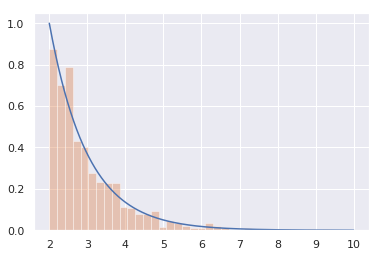

In [3]:
theta = 2
x = np.linspace(theta, 10, 1000)
sns.lineplot(x, np.exp(theta - x))
_ = sns.distplot(rvs(theta, 1000), kde=False, norm_hist=True)

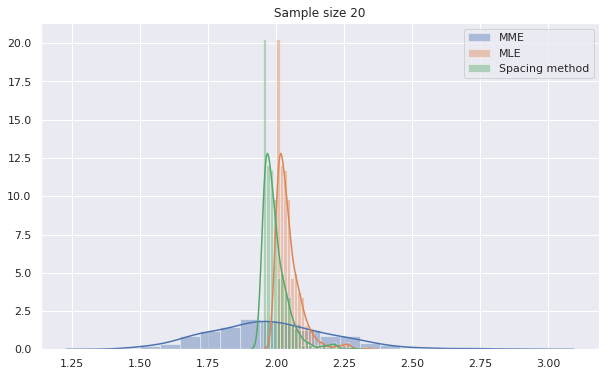

In [4]:
theta = 2
size = 20
mme, mle, sme = [], [], []
for _ in range(500):
    x = rvs(theta, size)
    mme.append(x.mean() - 1)
    mle.append(x.min())
    sme.append(x.min() + np.log(size/(size+1)))
plt.figure(figsize=(10, 6))
_ = sns.distplot(mme, label='MME')
_ = sns.distplot(mle, label='MLE')
_ = sns.distplot(sme, label='Spacing method')
_ = plt.title(f'Sample size {size}')
_ = plt.legend()

Как видно по графику оценка методом спэйсингов оказалась более точной,
<br>
худшей оценкой оказалась оценка методом моментов.
<br>
Так же из выражения для оценки методом спэйсингов видно, что 
<br>
в данном случае при увеличении количества сэмплов она будет
<br>
приближаться к оценке ОМП

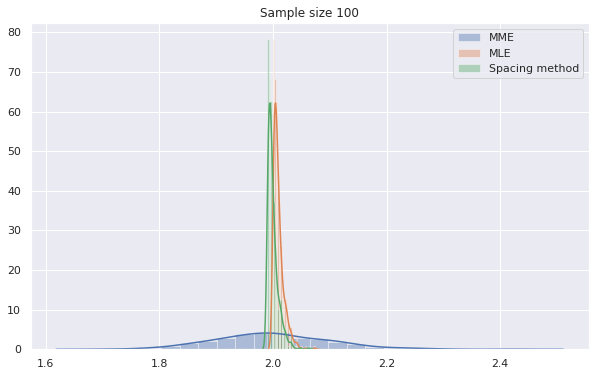

In [5]:
theta = 2
size = 100
mme, mle, sme = [], [], []
for _ in range(500):
    x = rvs(theta, size)
    mme.append(x.mean() - 1)
    mle.append(x.min())
    sme.append(x.min() + np.log(size/(size+1)))
plt.figure(figsize=(10, 6))
_ = sns.distplot(mme, label='MME')
_ = sns.distplot(mle, label='MLE')
_ = sns.distplot(sme, label='Spacing method')
_ = plt.title(f'Sample size {size}')
_ = plt.legend()

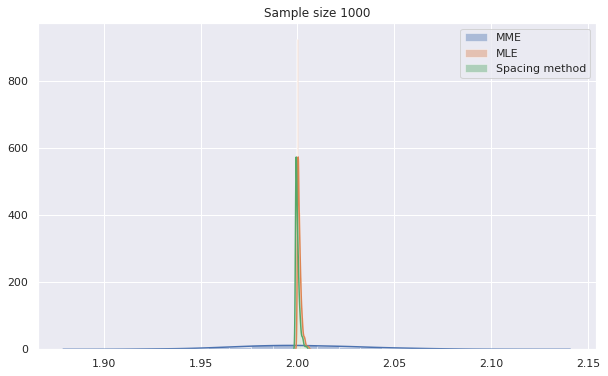

In [6]:
theta = 2
size = 1000
mme, mle, sme = [], [], []
for _ in range(500):
    x = rvs(theta, size)
    mme.append(x.mean() - 1)
    mle.append(x.min())
    sme.append(x.min() + np.log(size/(size+1)))
plt.figure(figsize=(10, 6))
_ = sns.distplot(mme, label='MME')
_ = sns.distplot(mle, label='MLE')
_ = sns.distplot(sme, label='Spacing method')
_ = plt.title(f'Sample size {size}')
_ = plt.legend()

### Ex. 2

В партии пушек с некоторой вероятностью появляется пушка с браком. В файле Sample1.txt записаны точки падения 
<br>
снаряда по точке 0. В файле Sample2.txt записаны результаты для пушки с браком. А в файле Sample3.txt записаны 
<br>
результаты выстрелов батареи из большого числа пушек. Оценить вероятность брака.

In [7]:
good_gun_obs = np.array(list(map(float, open('Sample1.txt').readlines()[0].split())))
bad_gun_obs = np.array(list(map(float, open('Sample2.txt').readlines()[0].split())))
battery_obs = np.array(list(map(float, open('Sample3.txt').readlines()[0].split())))

In [8]:
good_gun_obs.shape, bad_gun_obs.shape, battery_obs.shape

((4000,), (6000,), (3000,))

Уравнения моментов:
<br>
$\mathbb{E}\left[X_{good}\right] = \overline{X}_{good}$
<br>
$\mathbb{E}\left[X_{good}\right] = \overline{X}_{bad}$
<br>
$\mathbb{E}\left[X_{battery}\right] = \overline{X}_{battery} = (1-p)\overline{X}_{good} + p\overline{X}_{bad}$
<br>
$p = \frac{\overline{X}_{battery} - \overline{X}_{good}}{\overline{X}_{bad} - \overline{X}_{good}}$

In [9]:
mu_good, mu_bad, mu_battery = good_gun_obs.mean(), bad_gun_obs.mean(), battery_obs.mean()
p = (mu_battery - mu_good) / (mu_bad - mu_good)
print(f'Вероятность брака: {p: .4f}')

Вероятность брака:  0.6571


### Ex. 3

Выборка $\left(X_1, \dots, X_n\right)$ имеет распределние Коши со сдвигом $\theta$. Численно найти ОМП и сравнить ее на нескольких выборках с медианной в с точки зрения среднего разброса.

In [10]:
def mle_cauchy(x, gamma, init_point):
    def loss(theta):
        return np.log(1 + (x - theta)**2 / gamma).sum()
    return scipy.optimize.minimize(loss, init_point)

In [11]:
gamma = 1
theta = 1.7
c_dist = scipy.stats.cauchy(theta, gamma)
x = c_dist.rvs(100)

In [12]:
theta_mle = mle_cauchy(x, gamma, 0)
theta_mle

      fun: 135.26835518071454
 hess_inv: array([[0.01886107]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.71773808])

In [13]:
diff_mle = []
diff_median = []
for i in range(50):
    x = c_dist.rvs(100)
    diff_mle.append(mle_cauchy(x, gamma, 0).x - theta)
    diff_median.append(x[100//2 - 1: 100//2 + 1].mean() - theta)
print(f'Median std error: {np.std(diff_median):.3f}')
print(f'MLE std error: {np.std(diff_mle):.3f}') 

Median std error: 6.731
MLE std error: 0.151


По результату получаем, что ОМП оказалась лучше, чем оценка медианой в смысле средне квадратичного отклонения